## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
dataset = pd.read_csv("./titanic.csv")
dataset.shape

(891, 12)

In [12]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [136]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='#F5E398'><b>Ваші висновки:</b></font> є багато пропущених значень по колонці Age (177) та 2 значення по колонці Embarked. Велика кількість значень також відсутня у колонці Cabin (687), тому цей атрибут для аналізу даних не використовуватиметься.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



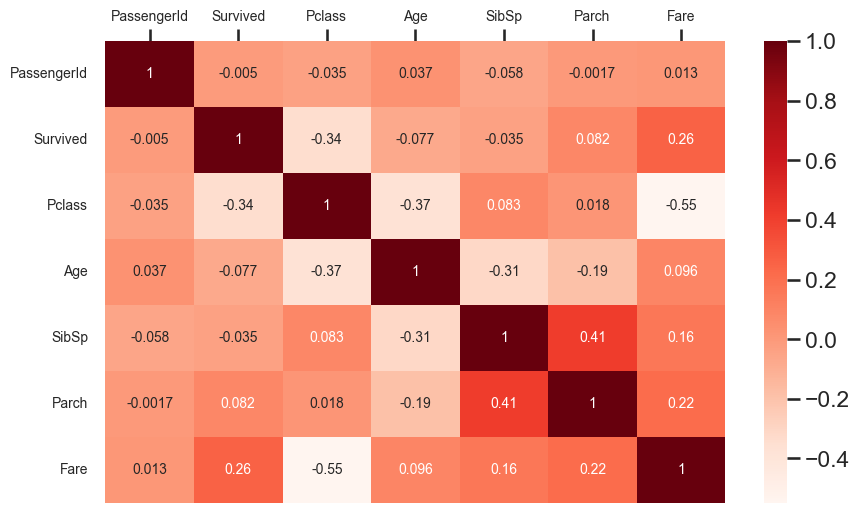

In [4]:
num_data = dataset.select_dtypes(include=['number'])
corr_coefficients = num_data.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients, annot=True, cmap='Reds', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()


<font color='#F5E398'><b>Ваші висновки:</b></font> найбільший прямий зв'язок мають такі атрибути як Parch та SibSp (0.41), Fare та Survived (0.26) та Fare і Parch (0.22). Найбільший обернений зв'язок мають такі атрибути як Fare та Pclass (-0.55), Age та Pclass (-0.37), Pclass та Survived (-0.34) та SibSp і Age (-0.31). Всі інші пари атрибутів мають коефіцієнти, близькі до 0, що свідчить про слабкий зв'язок.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [117]:
dataset = pd.read_csv('titanic.csv')

def process_col(df, col_name: str, group_col):
    df[col_name] = df.groupby(group_col)[col_name].transform(lambda x: x.fillna(x.median().round().astype(int)))

display(dataset.head(10))

process_col(dataset, "Age", ["Sex"])

display(dataset.head(10))

dataset.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='#F5E398'><b>Ваші висновки:</b></font> за допомогою використання функції ми отримали датасет із заповненою колонкою Age, яка тепер не містить пропущених значень, що дозволятиме використовувати даний атрибут під час подальшого аналізу. Завдяки тому, що ми використали під час заповнення медіану, середній вік пасажирів не змінився сильно.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





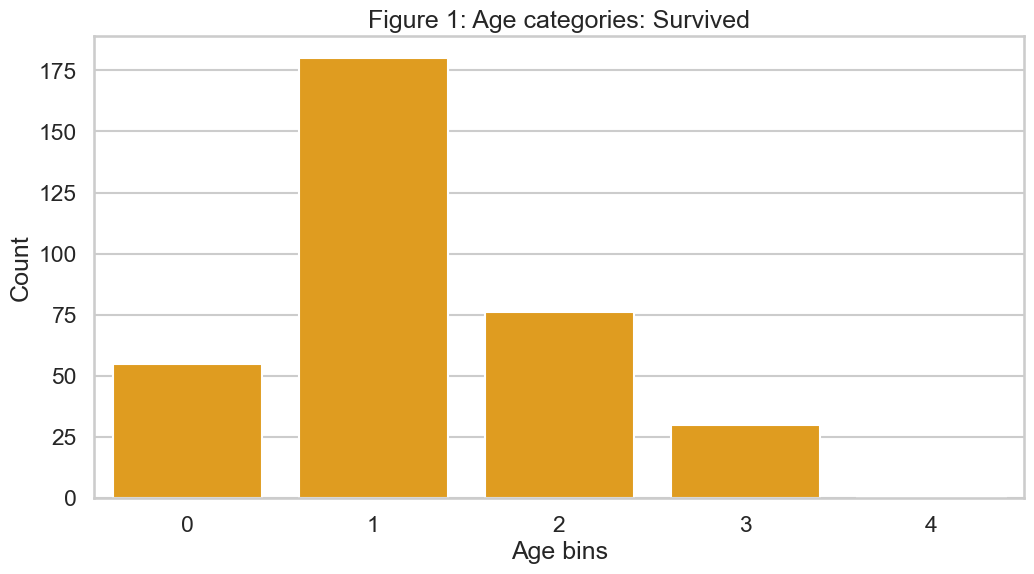

In [132]:
age_bins = [0, 16, 32, 48, 64, 80]
age_categories = [0, 1, 2, 3, 4]

dataset["Age_bin"] = pd.cut(dataset["Age"], age_bins, labels=age_categories)

age_groups = dataset.loc[dataset["Survived"] == 1, ["Age_bin"]].value_counts().reset_index()
age_groups.columns = ["Age_bin", "Count"]

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=age_groups, ax=ax, color='orange', x="Age_bin", y="Count")

ax.set_xlabel("Age bins")
ax.set_ylabel("Count")
ax.set_title("Figure 1: Age categories: Survived")

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> з графіку можна зробити висновок, що найбільше людей було у другій віковій категорії (від 16 до 32 років), кількістю в більше ніж 500 людей. Найменше було людей в останній п'ятій категорії (від 64 до 80 років).

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [4]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], 4, labels=[0, 1, 2, 3])


Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

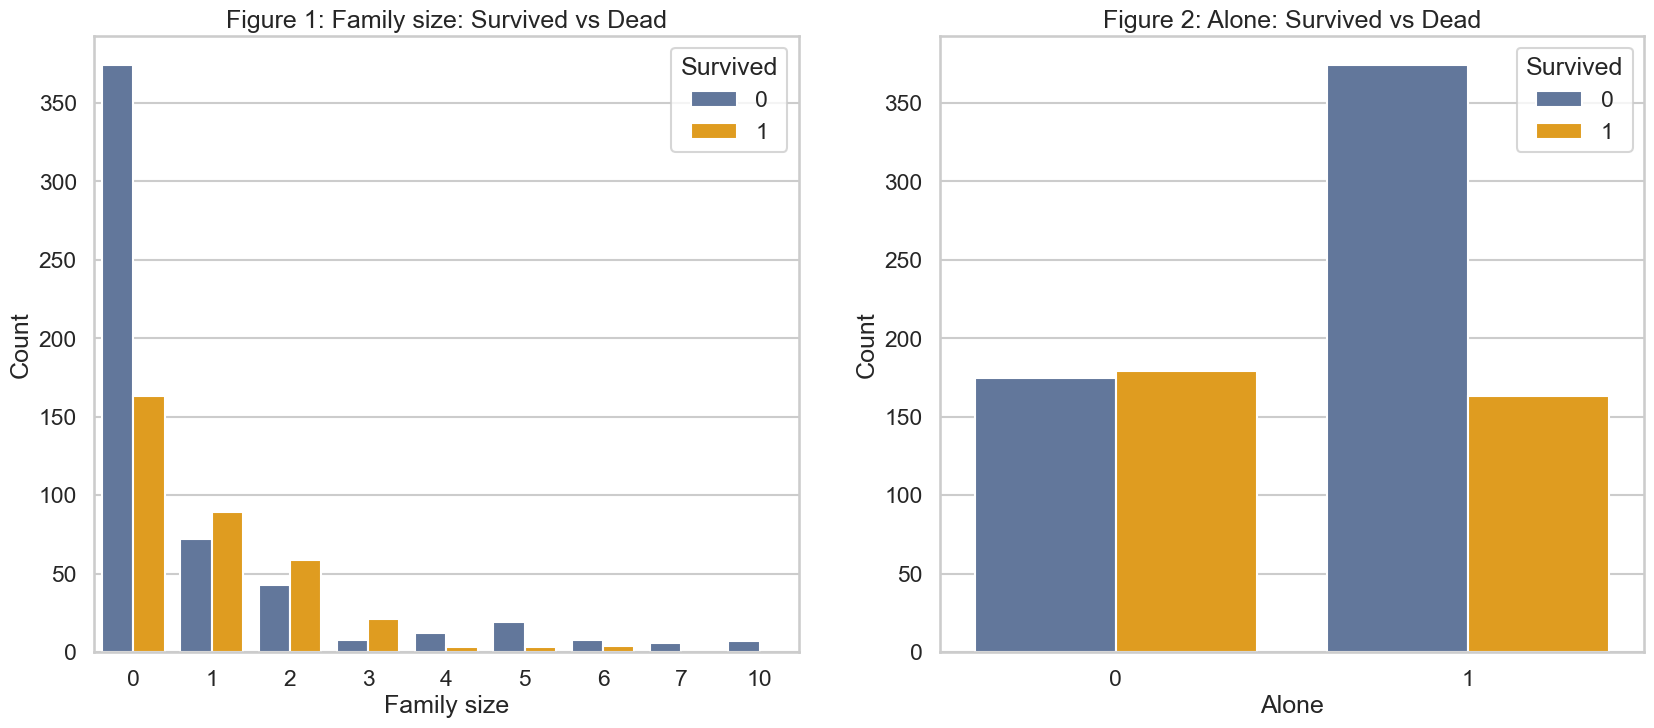

In [5]:
dataset["Family_size"] = dataset[["Parch", "SibSp"]].sum(axis=1)
dataset["Alone"] = dataset.apply(lambda row: 1 if row["Family_size"] == 0 else 0, axis=1)

survived1 = dataset.groupby("Family_size")["Survived"].value_counts()
df_survived1 = pd.DataFrame({"Survived": survived1.index.get_level_values("Survived"), "Family size": survived1.index.get_level_values("Family_size"), "Count": survived1.values})

survived2 = dataset.groupby("Alone")["Survived"].value_counts()
df_survived2 = pd.DataFrame({"Survived": survived2.index.get_level_values("Survived"), "Alone": survived2.index.get_level_values("Alone"), "Count": survived2.values})

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data = df_survived1, x = "Family size", y = "Count", hue="Survived", ax=ax1, palette=['#5975A4', 'orange'])
sns.barplot(data = df_survived2, x = "Alone", y = "Count", hue="Survived", ax=ax2, palette=['#5975A4', 'orange'])

ax1.set_title("Figure 1: Family size: Survived vs Dead")
ax2.set_title("Figure 2: Alone: Survived vs Dead")

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> з першого графіку можна побачити, що максимально в сім'ї було 10 людей. Найбільше пасажирів на титаніку не мали родини, і людей з даної категорії набагато більше загинуло, ніж вижило. Проте ті пасажири, які мали від 1 до 3 родичів в сім'ї, мали кращу статистику виживання, оскільки в такому випадку більше людей вижило, аніж загинуло. Сім'ї, які мали більше людей, майже повністю вмирали. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [88]:
dataset = dataset.drop(["Cabin", "Ticket", "PassengerId"], axis="columns")
display(dataset.head(5))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<font color='#F5E398'><b>Ваші висновки:</b></font> атрибут Cabin необхідно видалити, адже в ньому переважна кількість значень пропущена і заповнити таку колонку потрібними значеннями не вийде. Також, на мою думку, колонка Ticket не буде корисною для аналізу, оскільки вона відповідає за номер квитка, а таку інформацію також не буде де використати. Також я прибрала атрибут PassengerId, оскільки він унікальний для кожного пасажира і в аналізі не матиме цінності. Атрибут Name містить лише унікальні значення, проте з нього можна 

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [19]:
num_df = dataset.copy()

dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in dataset["Name"]]
titles = dataset['Title'].unique()

titles_map = {}
for ind, value in enumerate(titles):
    titles_map[value] = ind

sex_map = {"female": 1, "male": 0}
embarked_map = {"S": 1, "Q": 2, "C": 3}

num_df["Title"] = num_df["Title"].map(titles_map)
num_df["Sex"] = num_df["Sex"].map(sex_map)
num_df["Embarked"] = num_df["Embarked"].map(embarked_map)


display(num_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Family_size,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1.0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,3.0,2,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1.0,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1.0,2,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1.0,1,0,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1.0,1,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,1.0,1,3,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,3.0,1,0,1,0


<font color='#F5E398'><b>Ваші висновки:</b></font> кожному унікальному значенню в колонках Sex, Embarked та Title (дана колонка містить титули чоловіків та жінок, взятих з атрибуту Name) було присвоєно власне число замість використання рядкових значень. Нам необхідно було провести дане перетворення для того, щоб датасет можна було використовувати в алгоритмах машинного навчання, оскільки воно має проводитись на чисельних значеннях, а не категоріальних.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



C:\Users\User\AppData\Local\Temp\ipykernel_8336\3805277200.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


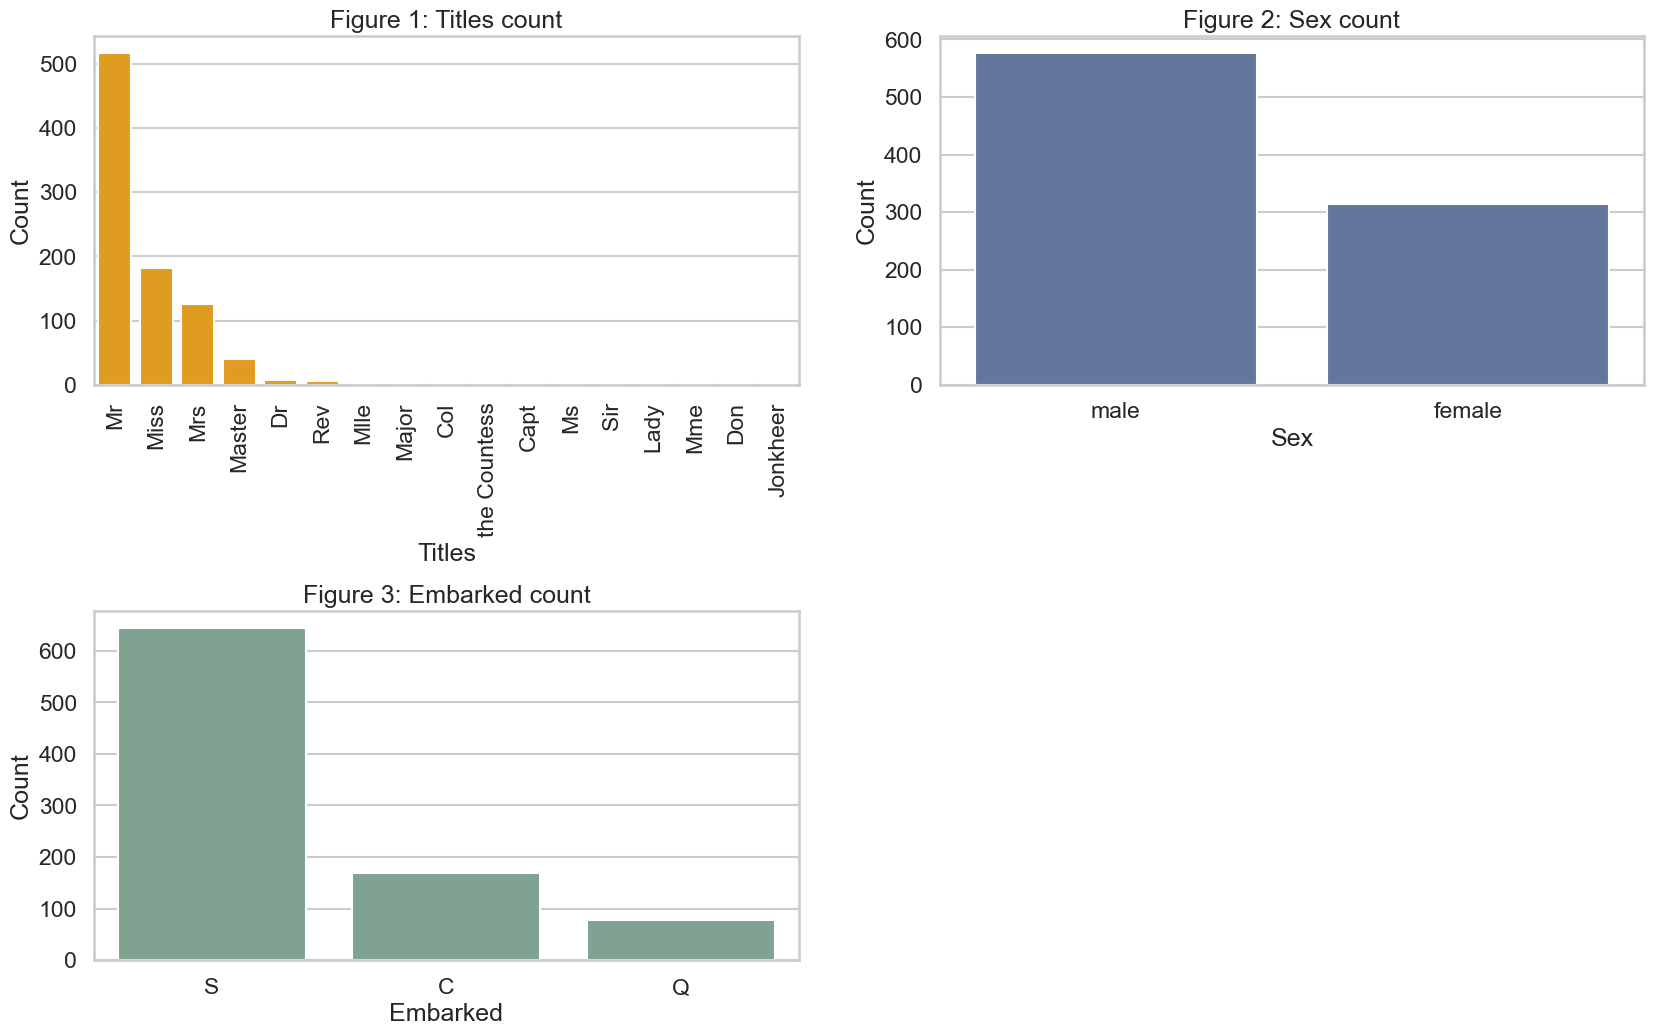

In [64]:
category_df = dataset.select_dtypes(exclude=["number","bool_", "category"]).drop("Name", axis="columns")

# display(category_df)

df_titles = pd.DataFrame({"Titles": category_df["Title"].value_counts().index.get_level_values("Title"), "Count": category_df["Title"].value_counts().values})
df_sex = pd.DataFrame({"Sex": category_df["Sex"].value_counts().index.get_level_values("Sex"), "Count": category_df["Sex"].value_counts().values})
df_embarked = pd.DataFrame({"Embarked": category_df["Embarked"].value_counts().index.get_level_values("Embarked"), "Count": category_df["Embarked"].value_counts().values})

fig = plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.65)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.barplot(data=df_titles, x = "Titles", y = "Count", ax=ax1, color="orange")
ax1.set_title("Figure 1: Titles count")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(data=df_sex, x = "Sex", y = "Count", ax=ax2, color="#5975A4")
ax2.set_title("Figure 2: Sex count")

sns.barplot(data=df_embarked, x = "Embarked", y = "Count", ax=ax3, color="#7AA88F")
ax3.set_title("Figure 3: Embarked count")

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> категорія Title містить 17 унікальних значень, найпопулярнішими з яких є титул Mr (більше 500) та Miss (майже 200). Категорія Sex містить 2 унікальні значення - female та male. На даному графіку можна побачити, що кількість чоловіків значно переважає над кількістю жінок. Остання категорія - Embarked, яка відповідає за місце посадки людей, містить 3 унікальні значення - S, C та Q. Найпопулярнішим значенням є S (близько 650).

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [86]:
numeric_df = dataset.select_dtypes(include=["number"])
display(numeric_df.head())

# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20, 30))

# sns.barplot(data=numeric_df["Survived"].value_counts(),ax=ax1)
# sns.barplot(data=numeric_df["Pclass"].value_counts(),ax=ax2)
# ax1.set_title("Figure 1: Survived = 0")
# ax1.set_ylabel("Frequency")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Alone
0,1,0,3,22.0,1,0,7.2500,1,0
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [ ]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.